In [14]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [15]:
df_train=pd.read_csv('./datasets/Trainset.csv')
df_target=pd.read_csv('./datasets/y_train.csv')

Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [17]:
attributes = [col for col in df_train.columns if col != 'Churn']
X = df_train[attributes].values
y = df_target

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100, 
                                                    stratify=y)

Grid Search

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [19]:
def report(results, n_top):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [20]:
param_list = {'max_depth': [None] + list(np.arange(5, 12)),
              'min_samples_split': [2,5,10,20,30,50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 180, 200, 220, 240, 280, 300],
              'min_samples_leaf': [1,2,5,10,20,30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
              'criterion': ['entropy','gini']
             }
clf = DecisionTreeClassifier()

random_search = RandomizedSearchCV(clf, param_distributions=param_list, 
                                   n_iter=100)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_

In [21]:
report(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.792 (std: 0.006)
Parameters: {'min_samples_split': 90, 'min_samples_leaf': 40, 'max_depth': 11, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.791 (std: 0.005)
Parameters: {'min_samples_split': 60, 'min_samples_leaf': 40, 'max_depth': 11, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.790 (std: 0.001)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 50, 'max_depth': 6, 'criterion': 'gini'}



In [22]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7955 (+/- 0.03)
F1-score: 0.7147 (+/- 0.04)


Test

In [23]:
df_test=pd.read_csv('../datasets/Testset.csv')
df_target_test=pd.read_csv('../datasets/y_test.csv')

In [24]:
y_pred = clf.predict(df_test.values)

In [25]:
print('Accuracy %s' % accuracy_score(df_target_test, y_pred))
print('F1-score %s' % f1_score(df_target_test, y_pred, average=None))

Accuracy 0.7863733144073811
F1-score [0.86109829 0.53763441]


In [26]:
print('Accuracy %s' % accuracy_score(df_target_test, y_pred))
print('F1-score %s' % f1_score(df_target_test, y_pred, average=None))
print(classification_report(df_target_test, y_pred))
confusion_matrix(df_target_test, y_pred)

Accuracy 0.7863733144073811
F1-score [0.86109829 0.53763441]
             precision    recall  f1-score   support

          0       0.82      0.90      0.86      1035
          1       0.63      0.47      0.54       374

avg / total       0.77      0.79      0.78      1409



array([[933, 102],
       [199, 175]], dtype=int64)

test sui dati di training che abbiamo rimosso

In [32]:
df=pd.read_csv('../datasets/Trainset.csv')
df['Churn']=df_target

In [29]:
importance= clf.feature_importances_
importance

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.37349165e-04,
       9.45990785e-03, 1.08890378e-02, 2.51906673e-02, 1.75880405e-02,
       0.00000000e+00, 2.25148499e-03, 3.05484021e-03, 3.50983277e-03,
       1.75755463e-02, 4.61946262e-01, 1.35035126e-02, 7.20597421e-03,
       1.79668806e-01, 5.69216838e-02, 5.15843834e-03, 1.85638616e-01])

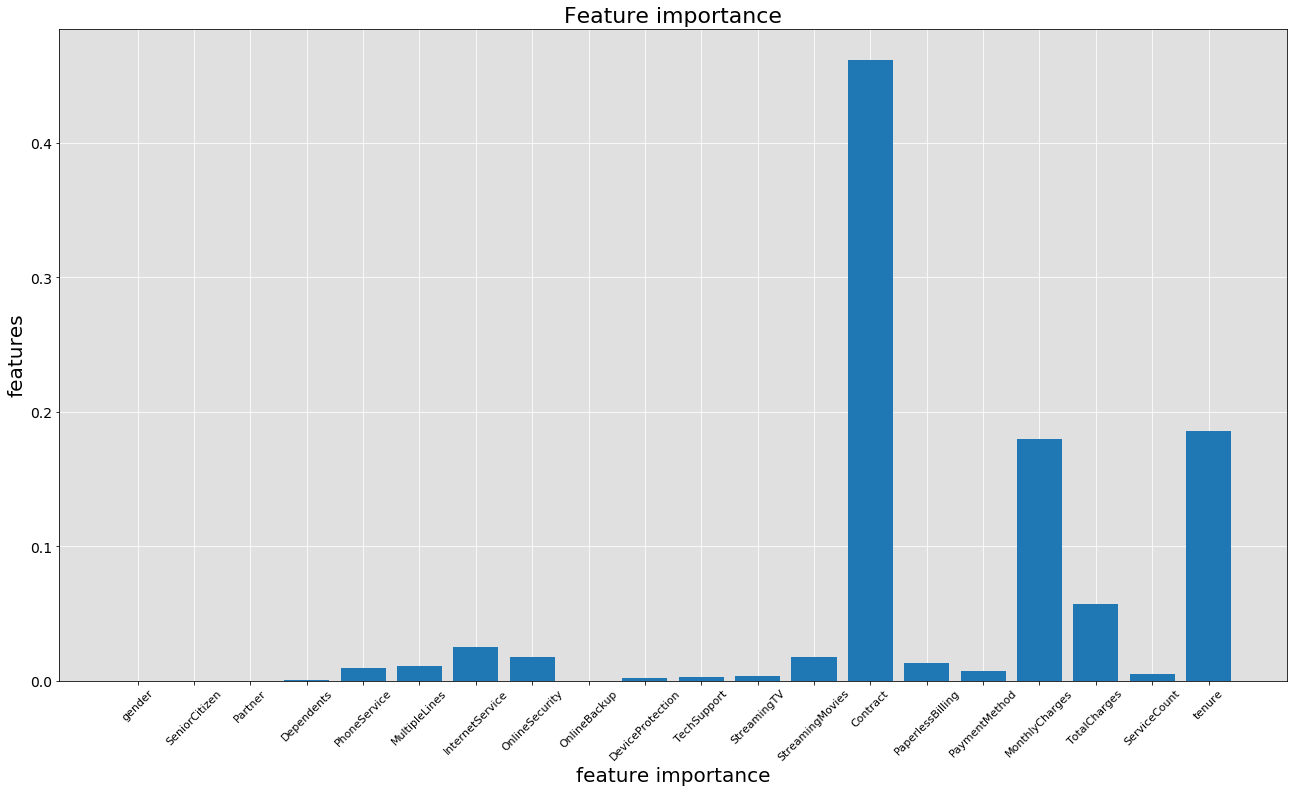

In [43]:
f = plt.figure(figsize=(22,12))
ax = f.add_subplot(1,1,1)

ax.bar(df_train.columns, importance)

plt.ylabel('features',fontsize=20)
plt.xlabel('feature importance',fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=11,rotation=45)
plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Feature importance', fontsize=22)


plt.savefig('feature_importance.png')

plt.show()

In [32]:
import pydotplus
from sklearn import tree
from IPython.display import Image

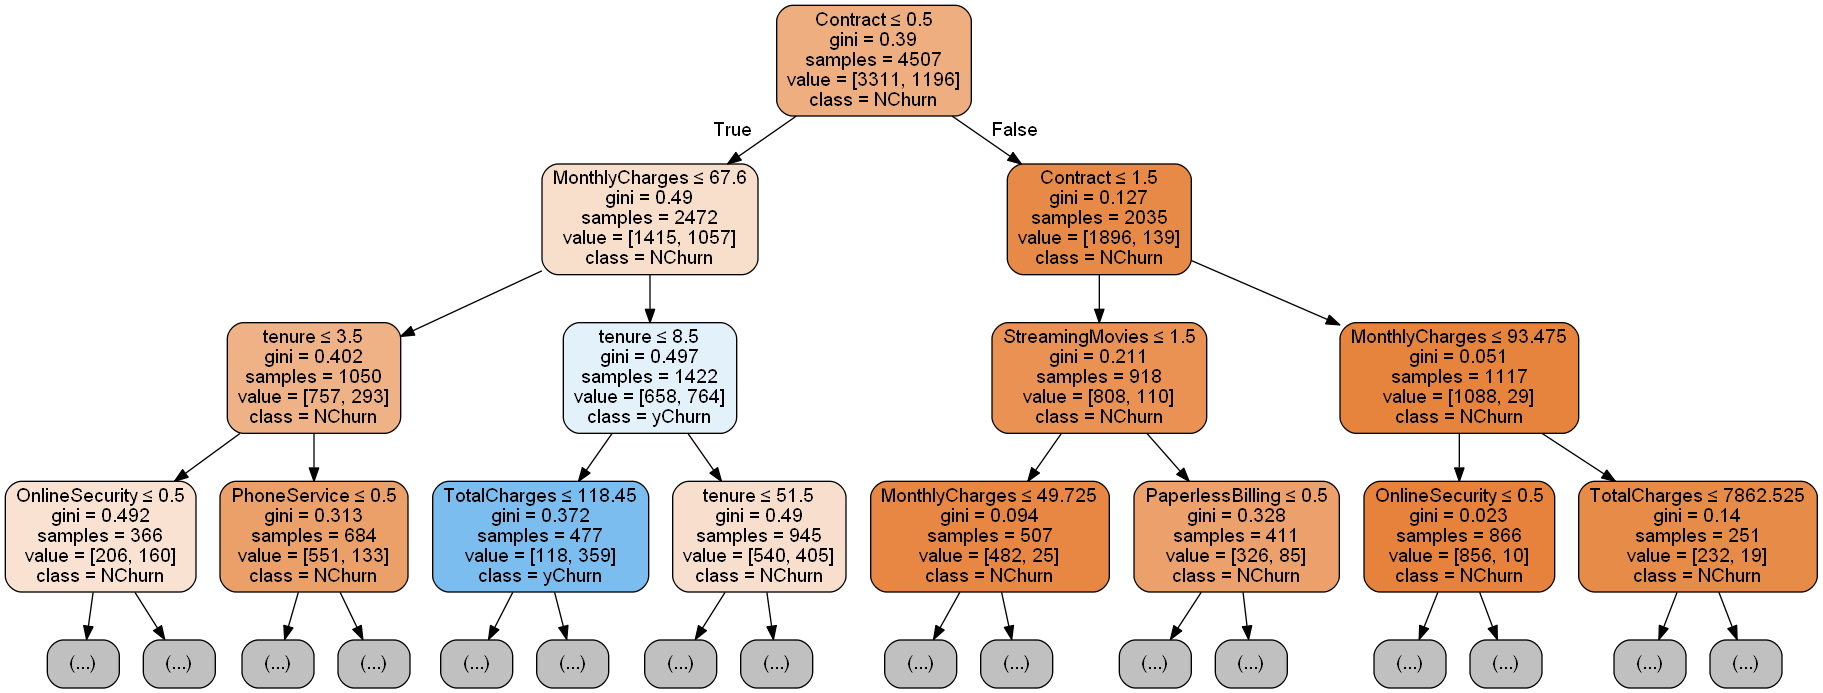

In [36]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=df_train.columns,
                                class_names=['yChurn' if x == 1 else 'NChurn' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=3
                                )  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())